In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [2]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('terrabrasilis_legal_amazon_26_4_2021_1622080569977.csv', sep=";")
df.dtypes

year         int64
area km²    object
uf          object
dtype: object

In [3]:
df.head()

,year,area km²,uf
0,2020,25.00,TOCANTINS
1,2020,297.00,RORAIMA
2,2020,"1,273.00",RONDÔNIA
3,2020,"4,899.00",PARÁ
4,2020,"1,779.00",MATO GROSSO


In [4]:
df

,year,area km²,uf
0,2020,25.00,TOCANTINS
1,2020,297.00,RORAIMA
2,2020,"1,273.00",RONDÔNIA
3,2020,"4,899.00",PARÁ
4,2020,"1,779.00",MATO GROSSO
...,...,...,...
292,1988,"5,140.00",MATO GROSSO
293,1988,"2,450.00",MARANHÃO
294,1988,60.00,AMAPÁ
295,1988,"1,510.00",AMAZONAS


In [5]:
df['area km²'] = df['area km²'].str.replace(',','').astype(float).astype(int)
df.head()

,year,area km²,uf
0,2020,25,TOCANTINS
1,2020,297,RORAIMA
2,2020,1273,RONDÔNIA
3,2020,4899,PARÁ
4,2020,1779,MATO GROSSO


In [6]:
df = df.rename(columns={'area km²':'area'})
df.head()

,year,area,uf
0,2020,25,TOCANTINS
1,2020,297,RORAIMA
2,2020,1273,RONDÔNIA
3,2020,4899,PARÁ
4,2020,1779,MATO GROSSO


In [7]:
X = df.year.values.reshape(-1, 1)
y = df.area.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (297, 1) (297, 1)


array([[2020],
       [2020],
       [2020],
       [2020],
       [2020],
       [2020],
       [2020],
       [2020],
       [2020],
       [2019],
       [2019],
       [2019],
       [2019],
       [2019],
       [2019],
       [2019],
       [2019],
       [2019],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2016],
       [2016],
       [2016],
       [2016],
       [2016],
       [2016],
       [2016],
       [2016],
       [2016],
       [2015],
       [2015],
       [2015],
       [2015],
       [2015],
       [2015],
       [2015],
       [2015],
       [2015],
       [2014],
       [2014],
       [2014],
       [2014],
       [2014],
       [2014],
       [2014],
       [2014],
       [2014],
       [2013],
       [2013],
       [2013],
       [20

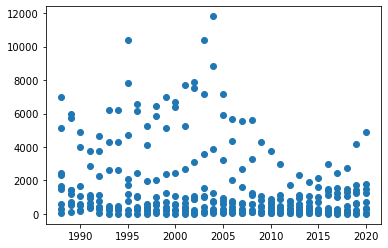

In [8]:
plt.scatter(X, y)
  # from Stackoverflow-- "Your variable  probably has the wrong shape"

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
model.fit(X, y)

LinearRegression()

In [11]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-45.33604427]]
y-axis intercept:  [92392.95122797]


In [12]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1988]]
Max X Value: [[2020]]


In [13]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

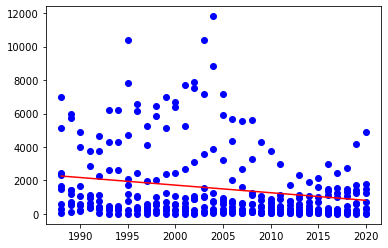

In [15]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

# 1. could your x0 be a 1D tensor? It should be of shape [N,n] where N is the number of initial values and n is the state dimensionality.
#    https://github.com/cagatayyildiz/npde/issues/5

# 2. https://dataanalyticsireland.ie/2021/04/04/indexerror-index-2-is-out-of-bounds-for-axis-0-with-size-2/
#    (A) This error happens when you try to use a column index value does not exist as it is outside the index values for the columns that are in the data set.
#    (B) If this error does occur always check the expected index values for each column and compare against what you are trying to return.

# 3. https://www.programmersought.com/article/9203548541/
#    print(list.shape)
#    y = train_np[:, 0]
#    print(train_np)  
#   Modify the contents of the list so that it is not empty list! 
